In [1]:
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Carga de Datos

Nota: A partir del c13 al c18 son duplicados

In [2]:

conjuntoImgs = []
conjuntoGris = []
conjuntoBin = []
y = []

for i in range(1, 19):
    for j in range(10):
        ruta = f'Prueba/C{i}/N{j}.JPG'
        temp = cv2.imread(ruta)

        temp = cv2.resize(temp, (32, 64))
        temp_RGB = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        conjuntoImgs.append(temp)
        
        temp_gris = cv2.cvtColor(temp_RGB, cv2.COLOR_RGB2GRAY)
        conjuntoGris.append(temp_gris)
        
        _, temp_bin = cv2.threshold(temp_gris, 127, 1, cv2.THRESH_BINARY)
        conjuntoBin.append(temp_bin)
    
        match(j):
            case 0: y.append([1,0,0,0,0,0,0,0,0,0])
            case 1: y.append([0,1,0,0,0,0,0,0,0,0])
            case 2: y.append([0,0,1,0,0,0,0,0,0,0])
            case 3: y.append([0,0,0,1,0,0,0,0,0,0])
            case 4: y.append([0,0,0,0,1,0,0,0,0,0])
            case 5: y.append([0,0,0,0,0,1,0,0,0,0])
            case 6: y.append([0,0,0,0,0,0,1,0,0,0])
            case 7: y.append([0,0,0,0,0,0,0,1,0,0])
            case 8: y.append([0,0,0,0,0,0,0,0,1,0])
            case 9: y.append([0,0,0,0,0,0,0,0,0,1])

# Convertir las listas en arrays de numpy
conjuntoImgs = np.array(conjuntoImgs)
conjuntoGris = np.array(conjuntoGris)
conjuntoBin = np.array(conjuntoBin)
y = np.array(y)



### Declaración de funciones

In [14]:
# Definiendo funcion de activacion

def sigmoid(x):
	return 1/(1 + np.exp(-x))

def f_forward(x, w1, w2):
	# Oculta
	z1 = x.dot(w1)# Entrada de la capa 1 (oculta)
	a1 = sigmoid(z1)# Salia para la entrada de la capa 2
	
	# Capa de salida
	z2 = a1.dot(w2)# entrada de la capa 2 o de salida
	a2 = sigmoid(z2)# salida de la capa
	return(a2)

# Generacion aleatoria de pesos
def generate_wt(x, y):
	return np.random.randn(x, y)
	
# cálculo de la perdida con mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(Y)
	return(s)

def mse_loss(y_true, y_pred):
	t = np.array(y_true)
	p = np.array(y_pred)
	return np.mean((t-p) ** 2)

# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	
	# capa oculta
	z1 = x.dot(w1)# entrada de la capa 1
	a1 = sigmoid(z1)# entrada de la capa 2 (salida)
	
	# capa de salida
	z2 = a1.dot(w2)# entrada de la capa de salida
	a2 = sigmoid(z2)# salida de la capa de salida
	# error en la capa de salida
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1)))

	# Gradiente para w1 y w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Actualizando parámetros
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], Y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	k = np.argmax(Out)  # Índice del valor máximo
	# print(f"El numero en la imagen es: {r}.")
	# plt.figure()
	# plt.imshow(x.reshape(64, 32))
	# plt.show()
	return k

def predict_RGB(x, w1, w2):
	Out = f_forward(x, w1, w2)
	k = np.argmax(Out)  # Índice del valor máximo
	# print(f"El numero en la imagen es: {r}.")
	# plt.figure()
	# plt.imshow(x.reshape(64, 32, 3))
	# plt.show()
	return k

### Partición de los datos

In [4]:
X_train_RGB, X_test_RGB, Y_train_RGB, Y_test_RGB = train_test_split(conjuntoImgs, y, test_size = 0.2)
X_train_Gris, X_test_Gris, Y_train_Gris, Y_test_Gris = train_test_split(conjuntoGris, y, test_size = 0.2)
X_train_Bin, X_test_Bin, Y_train_Bin, Y_test_Bin = train_test_split(conjuntoBin, y, test_size = 0.2)

X_train_RGB = X_train_RGB.reshape(144, 1, -1)  
X_test_RGB = X_test_RGB.reshape(36, 1, -1)  
Y_train_RGB = Y_train_RGB.reshape(144, 1, -1)
Y_test_RGB = Y_test_RGB.reshape(36, 1, -1)

X_train_Gris = X_train_Gris.reshape(144, 1, -1)  
X_test_Gris = X_test_Gris.reshape(36, 1, -1)  
Y_train_Gris = Y_train_Gris.reshape(144, 1, -1)
Y_test_Gris = Y_test_Gris.reshape(36, 1, -1)

X_train_Bin = X_train_Bin.reshape(144, 1, -1)  
X_test_Bin = X_test_Bin.reshape(36, 1, -1)
Y_train_Bin = Y_train_Bin.reshape(144, 1, -1)
Y_test_Bin = Y_test_Bin.reshape(36, 1, -1)  

### Entrenamiento de las redes

##### RBG

In [5]:
w1_RGB = generate_wt(6144, 48)
w2_RGB = generate_wt(48, 10)
print(w1_RGB, "\n\n", w2_RGB)

[[-0.01787076 -0.93222538  0.55276608 ... -1.05742766 -0.19096215
   1.01984096]
 [ 0.12436982  0.41456372 -0.50063784 ...  0.55314409  1.52172252
  -1.63972507]
 [ 1.31158223  1.47206614 -2.54282389 ... -0.62062604  1.15695511
  -0.85505307]
 ...
 [-0.93821083 -1.23566463  0.05217586 ...  0.83104034  0.19156644
   0.01874618]
 [ 0.86404742  0.29155832  1.17700351 ...  0.62842968 -2.73834235
  -0.23220801]
 [-0.20547947 -1.27787643  0.18694557 ...  1.75135735  1.14711406
   0.75919268]] 

 [[ 0.40590386 -1.14158901 -1.26670803  0.38621366  1.88267201 -0.24175576
   0.0120921   0.09742775 -1.68028881  0.6785773 ]
 [ 0.5420519   0.97411634  0.61292406  1.30320969  0.30726571 -0.47742923
   0.22869794  1.82114793  0.44940173 -0.88974034]
 [-0.01649717  0.40757306  0.16874347 -0.05445472 -0.84373917 -1.02442924
  -0.37592337  2.22753004 -1.74220675 -1.47564408]
 [ 0.85454126  1.19463612  2.88179946  0.90299513 -0.21919106  1.6742164
  -0.45349157  1.52501946  0.2527204  -0.18731558]
 [ 0.1

In [6]:
acc_RGB, losss_RGB, w1_RGB, w2_RGB = train(X_train_RGB, Y_train_RGB, w1_RGB, w2_RGB, 0.1, 100)

C:\Users\abiab\AppData\Local\Temp\ipykernel_24720\3133336208.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


epochs: 1 ======== acc: 5.825932840399794
epochs: 2 ======== acc: 57.1038903671637
epochs: 3 ======== acc: 78.96601988866193
epochs: 4 ======== acc: 88.0973740243751
epochs: 5 ======== acc: 92.55859433086972
epochs: 6 ======== acc: 95.01762323606998
epochs: 7 ======== acc: 96.4885090310865
epochs: 8 ======== acc: 97.4232640349366
epochs: 9 ======== acc: 98.04596580899783
epochs: 10 ======== acc: 98.47683997995186
epochs: 11 ======== acc: 98.78460558233324
epochs: 12 ======== acc: 99.01054728845918
epochs: 13 ======== acc: 99.18045980214808
epochs: 14 ======== acc: 99.31098538661317
epochs: 15 ======== acc: 99.41316273227521
epochs: 16 ======== acc: 99.494497723529
epochs: 17 ======== acc: 99.56021110793542
epochs: 18 ======== acc: 99.61401058998514
epochs: 19 ======== acc: 99.65858011561433
epochs: 20 ======== acc: 99.69589683024522
epochs: 21 ======== acc: 99.7274406881753
epochs: 22 ======== acc: 99.75433578993416
epochs: 23 ======== acc: 99.77744743621548
epochs: 24 ======== acc: 99

#### Escala de Grises

In [7]:
w1_Gris = generate_wt(2048, 64)
w2_Gris = generate_wt(64, 10)
print(w1_Gris, "\n\n", w2_Gris)

[[-1.62240013  0.83344768  0.07163121 ...  0.81228114  1.19457168
  -0.27242576]
 [ 0.40407585 -0.06702794 -0.43886816 ...  0.93678846 -0.61368538
   1.12947064]
 [ 1.43408389 -0.46628213  1.81257523 ... -1.07367655  0.61958609
  -0.88307922]
 ...
 [-0.28162919 -0.48158265 -0.48812842 ...  0.03026321 -1.08968771
  -0.15629787]
 [ 0.93824652  0.71809694 -0.83970623 ...  0.22746593 -1.11501814
   0.68798001]
 [ 0.70178252 -1.01627843 -0.2435465  ... -0.03061121 -2.64064512
  -0.63016379]] 

 [[-6.03930422e-01  2.07928308e-01  4.17121468e-01  7.48440045e-02
   2.43401953e+00  7.96180822e-01 -1.21453084e+00 -6.60013496e-02
   8.43415700e-01  9.64895906e-01]
 [ 4.86207873e-01  5.74935844e-01  1.57976381e+00  5.72079069e-01
  -1.87928227e-01  5.03471765e-01 -5.65525289e-01 -5.57473654e-01
   1.21229527e-01  3.16227841e-01]
 [ 5.70130043e-01  2.14301324e-01  1.40862993e-01 -1.08485707e+00
   9.06237903e-01 -5.55141402e-01 -9.35280424e-01  1.10774618e+00
  -3.83845522e-01  1.05252738e+00]
 [ 1

In [8]:
acc_Gris, losss_Gris, w1_Gris, w2_Gris = train(X_train_Gris, Y_train_Gris, w1_Gris, w2_Gris, 0.1, 100)

C:\Users\abiab\AppData\Local\Temp\ipykernel_24720\3133336208.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


epochs: 1 ======== acc: -12.443972127816627
epochs: 2 ======== acc: 60.88392348269166
epochs: 3 ======== acc: 84.73512031686171
epochs: 4 ======== acc: 92.35115411418347
epochs: 5 ======== acc: 95.58450681844033
epochs: 6 ======== acc: 97.17029941297454
epochs: 7 ======== acc: 98.04487761274423
epochs: 8 ======== acc: 98.57222224783018
epochs: 9 ======== acc: 98.91270676710288
epochs: 10 ======== acc: 99.14462663075285
epochs: 11 ======== acc: 99.30947675392096
epochs: 12 ======== acc: 99.43077007169919
epochs: 13 ======== acc: 99.52258786016361
epochs: 14 ======== acc: 99.59376219243757
epochs: 15 ======== acc: 99.65005335629299
epochs: 16 ======== acc: 99.69534541328208
epochs: 17 ======== acc: 99.73233344195322
epochs: 18 ======== acc: 99.76293460538879
epochs: 19 ======== acc: 99.78854270668678
epochs: 20 ======== acc: 99.81019070132265
epochs: 21 ======== acc: 99.82865728058648
epochs: 22 ======== acc: 99.84453846915262
epochs: 23 ======== acc: 99.85829676273526
epochs: 24 =======

#### Binario

In [9]:
w1_Bin = generate_wt(2048, 64)
w2_Bin = generate_wt(64, 10)
print(w1_Bin, "\n\n", w2_Bin)

[[-0.11535915 -0.36220391  0.45226657 ...  0.07210268  0.31286678
  -0.99822093]
 [-0.16626534  0.18004308  1.40787366 ... -1.23795752  0.47478846
  -1.62083422]
 [ 2.6674533  -0.11590959  0.34508934 ...  0.36521363 -0.29355763
  -1.38632025]
 ...
 [ 0.78816478 -1.21844522 -1.69561718 ... -0.39127513 -0.8614789
  -1.95444117]
 [-0.10690872  1.31540832  0.31336641 ... -0.32959658 -1.0362288
   2.03866172]
 [-0.45787039  0.53943488 -0.73107446 ...  0.70607109 -0.59626965
   0.47946066]] 

 [[ 0.47538257 -0.22041659 -0.08646667 -0.28847711 -0.45346444  0.95150303
  -1.22054096  0.93434215  0.30694761  1.01420545]
 [ 0.41356236  0.6977782  -1.25013614 -0.73469378 -1.77508433  0.46907413
  -0.41741235 -0.58564846  0.10721102  0.20426483]
 [-1.10501861  1.98054991  2.03203671 -0.4275235   0.04299542 -0.62129706
  -0.55825192  0.70507617  0.64029959  1.6357503 ]
 [-0.80955326  0.86431508  1.29381224  1.25258114 -1.31597082 -1.29790312
   0.69365223  0.59507143  1.24767571  0.5382905 ]
 [-1.99

In [10]:
acc_Bin, losss_Bin, w1_Bin, w2_Bin = train(X_train_Bin, Y_train_Bin, w1_Bin, w2_Bin, 0.01, 100)

epochs: 1 ======== acc: -17.409499030969222
epochs: 2 ======== acc: 44.35336961598752
epochs: 3 ======== acc: 53.315911062392665
epochs: 4 ======== acc: 60.83203273551372
epochs: 5 ======== acc: 66.13800042885262
epochs: 6 ======== acc: 70.47965705740138
epochs: 7 ======== acc: 74.69124449077817
epochs: 8 ======== acc: 77.54888934059774
epochs: 9 ======== acc: 79.76587781275632
epochs: 10 ======== acc: 81.75368050219444
epochs: 11 ======== acc: 83.61444274764912
epochs: 12 ======== acc: 85.33720791787842
epochs: 13 ======== acc: 86.86642369360762
epochs: 14 ======== acc: 88.21157855963733
epochs: 15 ======== acc: 89.41559618657348
epochs: 16 ======== acc: 91.07022968798245
epochs: 17 ======== acc: 92.05092117751038
epochs: 18 ======== acc: 93.37907320878244
epochs: 19 ======== acc: 94.39160101214439
epochs: 20 ======== acc: 94.96125498173582
epochs: 21 ======== acc: 95.36979041493811
epochs: 22 ======== acc: 95.74149081959706
epochs: 23 ======== acc: 96.0992783080433
epochs: 24 =======

### Acuary Final

#### RGB

In [15]:
pred = []
real = []
for tx, ty in zip(X_test_RGB, Y_test_RGB):
    pred.append(predict_RGB(tx, w1_RGB, w2_RGB))
    real.append(np.argmax(ty))

error = 0
for p, r in zip(pred, real):
    if p != r:
        error += 1

aciertos = ((len(pred) - error) / len(pred)) * 100
perdida = mse_loss(real, pred)

print(f'Exactitud: {aciertos:.2f} %')
print(f'Perdida: {perdida:.2f}')
print(pred)
print(real)

Exactitud: 100.00 %
Perdida: 0.00
[2, 4, 1, 2, 8, 9, 9, 6, 9, 7, 1, 8, 6, 5, 5, 0, 4, 0, 4, 1, 2, 2, 7, 8, 5, 7, 7, 4, 6, 3, 0, 7, 6, 5, 0, 4]
[2, 4, 1, 2, 8, 9, 9, 6, 9, 7, 1, 8, 6, 5, 5, 0, 4, 0, 4, 1, 2, 2, 7, 8, 5, 7, 7, 4, 6, 3, 0, 7, 6, 5, 0, 4]


C:\Users\abiab\AppData\Local\Temp\ipykernel_24720\2380171718.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


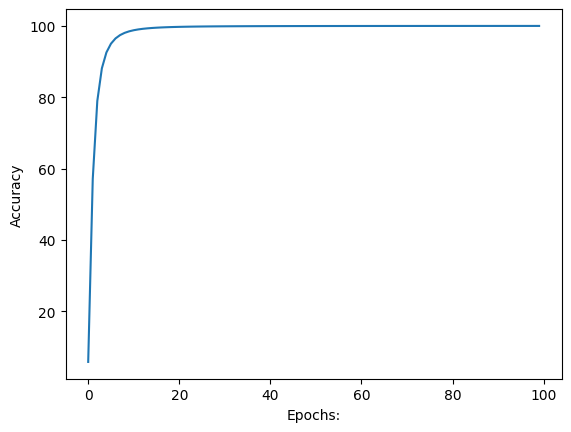

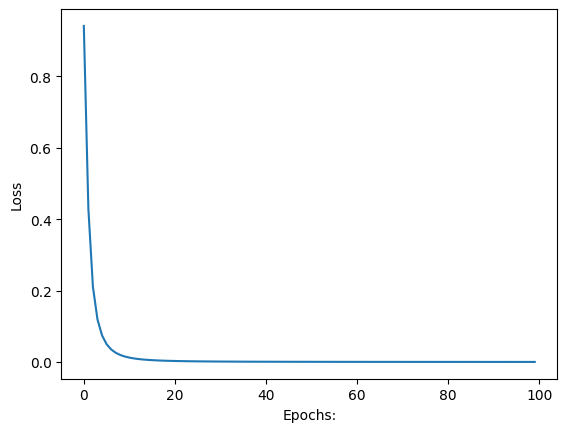

In [16]:
# plotting accuracy
plt.plot(acc_RGB)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()

# plotting Loss
plt.plot(losss_RGB)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()

#### Escala de Grises

In [17]:
pred = []
real = []
for tx, ty in zip(X_test_Gris, Y_test_Gris):
    pred.append(predict(tx, w1_Gris, w2_Gris))
    real.append(np.argmax(ty))

error = 0
for p, r in zip(pred, real):
    if p != r:
        error += 1

aciertos = ((len(pred) - error) / len(pred)) * 100
perdida = mse_loss(real, pred)

print(f'Exactitud: {aciertos:.2f} %')
print(f'Perdida: {perdida:.2f}')
print(pred)
print(real)

Exactitud: 100.00 %
Perdida: 0.00
[4, 5, 0, 1, 1, 8, 5, 9, 5, 9, 0, 8, 7, 9, 3, 3, 1, 8, 9, 1, 1, 5, 0, 1, 3, 5, 5, 3, 0, 0, 2, 7, 7, 7, 9, 6]
[4, 5, 0, 1, 1, 8, 5, 9, 5, 9, 0, 8, 7, 9, 3, 3, 1, 8, 9, 1, 1, 5, 0, 1, 3, 5, 5, 3, 0, 0, 2, 7, 7, 7, 9, 6]


C:\Users\abiab\AppData\Local\Temp\ipykernel_24720\2380171718.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


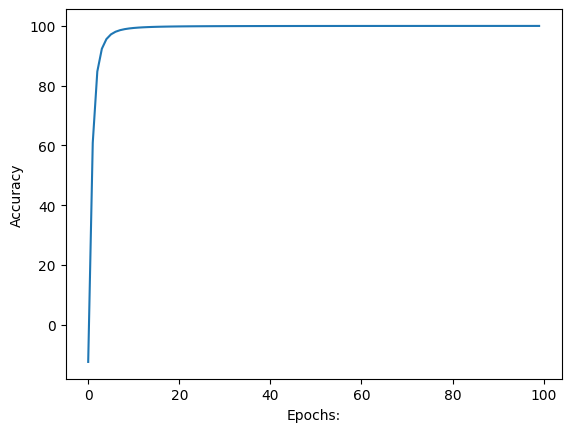

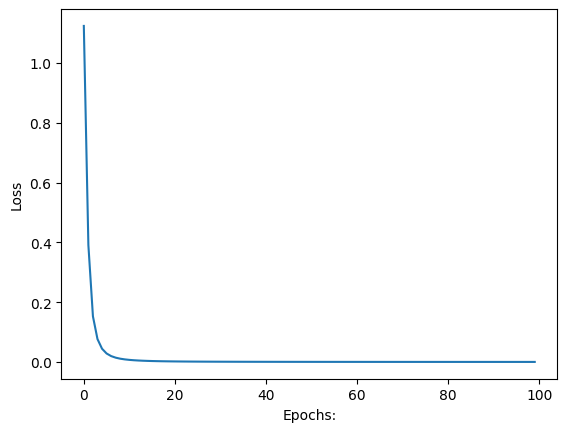

In [18]:
# plotting accuracy
plt.plot(acc_Gris)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()

# plotting Loss
plt.plot(losss_Gris)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()

#### Binario

In [19]:
pred = []
real = []
for tx, ty in zip(X_test_Bin, Y_test_Bin):
    pred.append(predict(tx, w1_Bin, w2_Bin))
    real.append(np.argmax(ty))

error = 0
for p, r in zip(pred, real):
    if p != r:
        error += 1

aciertos = ((len(pred) - error) / len(pred)) * 100
perdida = mse_loss(real, pred)

print(f'Exactitud: {aciertos:.2f} %')
print(f'Perdida: {perdida:.2f}')
print(pred)
print(real)

Exactitud: 100.00 %
Perdida: 0.00
[6, 8, 3, 0, 2, 2, 4, 3, 5, 7, 7, 8, 1, 5, 8, 2, 4, 8, 6, 3, 8, 9, 3, 6, 5, 3, 8, 1, 3, 0, 4, 7, 1, 9, 8, 2]
[6, 8, 3, 0, 2, 2, 4, 3, 5, 7, 7, 8, 1, 5, 8, 2, 4, 8, 6, 3, 8, 9, 3, 6, 5, 3, 8, 1, 3, 0, 4, 7, 1, 9, 8, 2]


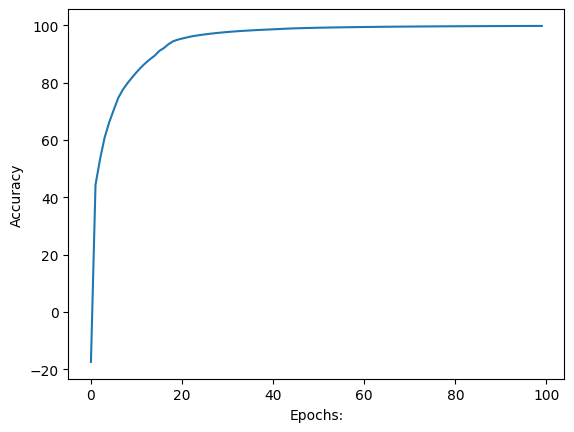

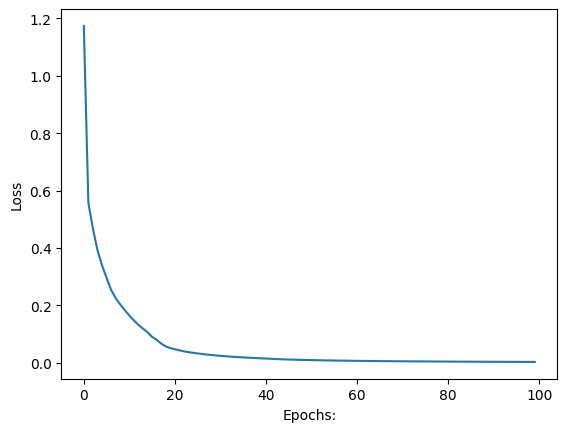

In [20]:
# plotting accuracy
plt.plot(acc_Bin)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()

# plotting Loss
plt.plot(losss_Bin)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()